In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = "/course_materials/climdat/lecture/data/"
data_file  = data_dir + "nao.dat"

!head $data_file

 1821 -99.990 -99.990 -99.990 -99.990 -99.990 -99.990  -2.624  -0.143 -99.990 -99.990 -99.990 -99.990 -99.990
 1822 -99.990 -99.990   2.988  -3.187   0.588  -0.862  -4.047  -0.190  -1.092  -2.003  -0.050  -0.734 -99.990
 1823  -3.387 -99.990 -99.990 -99.990   4.651  -0.835   0.580   2.903   0.669  -1.391  -0.757  -0.202 -99.990
 1824  -0.162   0.250  -1.438   1.462   1.342  -3.945  -2.747  -0.075   0.193 -99.990  -0.699  -0.006 -99.990
 1825  -0.226   0.211   0.327  -0.276   0.131   0.410  -0.919   1.430  -0.947   1.981   1.059  -1.305   0.156
 1826  -3.049   4.875  -0.975   1.782  -1.204   0.835   1.887   2.717  -0.755   0.183  -2.411  -0.591   0.274
 1827  -0.447  -3.717   1.834  -0.827   1.196  -0.075   2.022  -3.558  -0.075  -3.016  -1.417   2.702  -0.448
 1828   1.268   0.365  -0.183   0.042  -1.589  -1.330  -4.401  -2.543  -2.781   0.101  -2.571   3.040  -0.882
 1829  -2.481   0.319  -2.536   0.123   1.799  -0.096   0.333   0.773   0.777   0.709  -0.332  -0.425  -0.087
 1830  -2.

In [3]:
data = np.loadtxt(data_file)

# mask missing data
data = np.ma.array(data, mask=np.isclose(data, -99.990)) #isclose compare two arrays and give boolean values
#excluse the possibility of computation of masked data
time = np.arange(data[0, 0], data[-1, 0] + 1, 1/12)

nao = data[:, 1:-1].flatten()

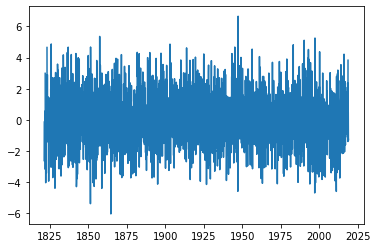

In [4]:
plt.plot(time, nao)

In [5]:
mon_frac = time % 1
print(mon_frac)
DJF = (np.isclose(mon_frac, 0) | np.isclose(mon_frac, 1) | np.isclose(mon_frac, 1/12) | np.isclose(mon_frac, 11/12)) & ~nao.mask

[0.         0.08333333 0.16666667 ... 0.75       0.83333333 0.91666667]


In [6]:
# select only DJF months
nao_DJF = nao[DJF]
time_DJF = time[DJF]

# sample winter 2004 - 2006
DJF_sample = DJF & (time >= (2004 - 3/24)) & (time < (2007 - 3/24))
N = np.count_nonzero(DJF_sample)

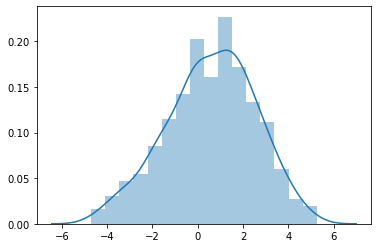

In [10]:
sns.distplot(nao_DJF)

In [7]:
print(nao_DJF.mean(), nao_DJF.std() / np.sqrt(len(nao_DJF)))
print(nao[DJF_sample].mean(), nao[DJF_sample].std(ddof=1) / np.sqrt(N))

0.586221465076661 0.08082504576216278
-0.3546666666666667 0.4304924828353891


In [18]:
norm_DJF = sns.distributions.stats.norm(loc=nao_DJF.mean(), scale=nao_DJF.std()/np.sqrt(N))

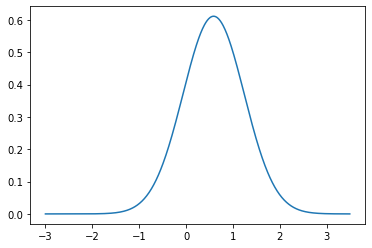

In [29]:
x = np.arange(-3, 3.5,0.01)
plt.plot(x, norm_DJF.pdf(x))

In [33]:
norm_DJF.cdf(nao[DJF_sample].mean())

0.07473130198558096

In [8]:
students_DJF = sns.distributions.stats.t(
    df=N-1,
    loc=nao_DJF.mean(),
    scale=nao[DJF_sample].std(ddof=1) / np.sqrt(N)
)

students_DJF.cdf(nao[DJF_sample].mean())

0.030166313666271163

In [9]:
rep = 1000000
simulated_mean = []

for i in range(rep):
    simulated_mean.append(np.random.choice(nao_DJF, N).mean())

simulated_mean = np.array(simulated_mean) #transforms it into a numpy array

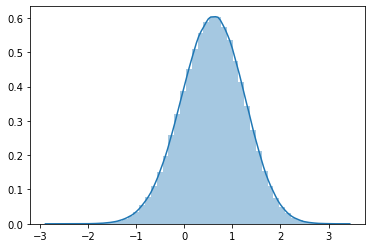

In [28]:
sns.distplot(simulated_mean)

In [36]:
np.count_nonzero(simulated_mean < nao[DJF_sample].mean()) / rep

0.07675

In [37]:
# average over winter => annual values
nao_DJF_mean = nao[DJF][2:].reshape((-1, 3)).mean(axis=-1)
time_DJF_mean = time[DJF][2:].reshape((-1, 3)).mean(axis=-1)

# sample winter 2004 - 2006
DJF_mean_sample = (time_DJF_mean >= 2003.9) & (time_DJF_mean <= 2006)
nao_DJF_mean_sample = nao_DJF_mean[DJF_mean_sample]
N_annual = np.count_nonzero(DJF_mean_sample)

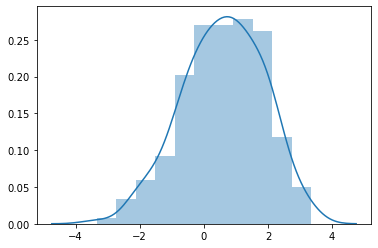

In [39]:
sns.distplot(nao_DJF_mean)

In [41]:
norm_winter = sns.distributions.stats.norm(loc=nao_DJF_mean.mean(), scale=nao_DJF_mean.std() / np.sqrt(N_annual))

In [42]:
norm_winter.cdf(nao_DJF_mean_sample.mean())

0.09564230917834926

In [44]:
students_winter = sns.distributions.stats.t(
    df=2,
    loc=nao_DJF_mean.mean(),
    scale=nao_DJF_mean_sample.std(ddof=1) / np.sqrt(N_annual)
)

students_winter.cdf(nao_DJF_mean_sample.mean())

0.04852608132879312

In [45]:
simulated_winter_mean = np.random.choice(nao_DJF_mean, (1000000, N_annual)).mean(axis=-1)

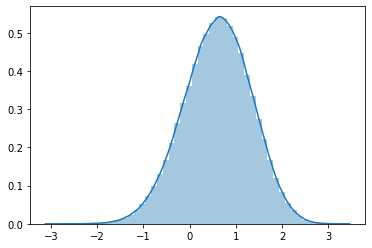

In [46]:
sns.distplot(simulated_winter_mean)

In [49]:
np.count_nonzero(simulated_winter_mean < nao_DJF_mean_sample.mean()) / 1e6

0.099594